# EDA

## Distributions (Univariate EDA)

/var/folders/_4/t03mdfy94ts0ylt8cw0q1bp00000gn/T/ipykernel_9169/4248858380.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2015-01-01", end="2023-12-31", progress=False)


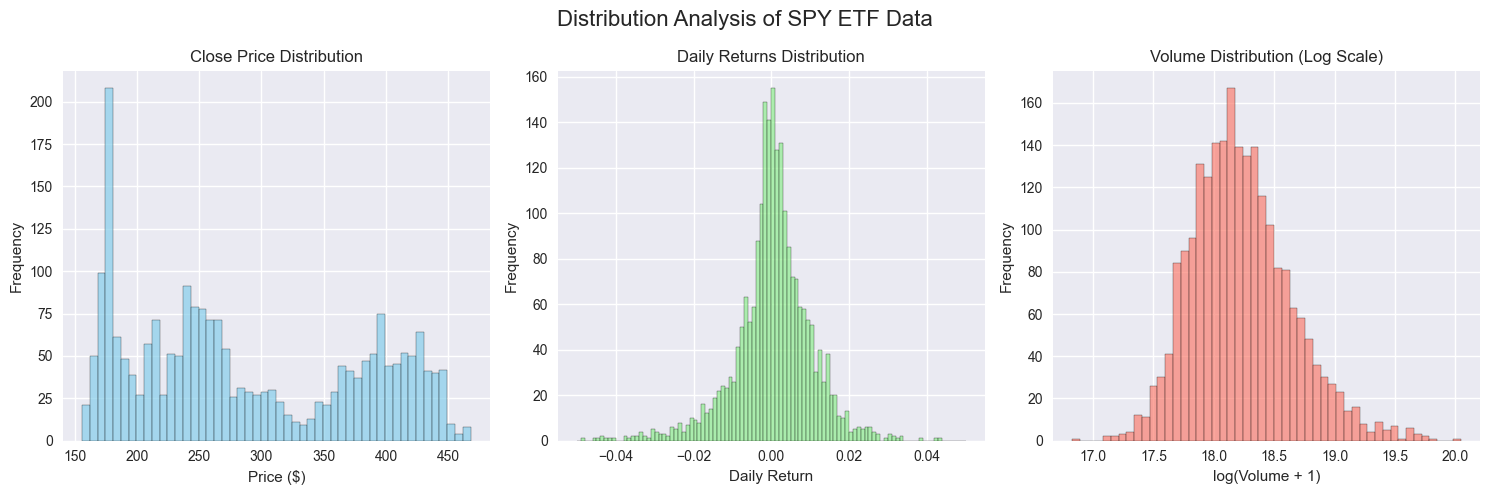

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import skew, kurtosis
import yfinance as yf

ticker = "SPY"
data = yf.download(ticker, start="2015-01-01", end="2023-12-31", progress=False)

# Set up plotting style
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Distribution Analysis of SPY ETF Data', fontsize=16)

# 1. Close Price Distribution
axes[0].hist(data['Close'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].set_title('Close Price Distribution')
axes[0].set_xlabel('Price ($)')
axes[0].set_ylabel('Frequency')

# 2. Daily Returns Distribution
daily_returns = data['Close'].pct_change().dropna()
axes[1].hist(daily_returns, bins=100, alpha=0.7, color='lightgreen', edgecolor='black', range=(-0.05, 0.05))
axes[1].set_title('Daily Returns Distribution')
axes[1].set_xlabel('Daily Return')
axes[1].set_ylabel('Frequency')

# 3. Volume Distribution (log scale)
axes[2].hist(np.log1p(data['Volume']), bins=50, alpha=0.7, color='salmon', edgecolor='black')
axes[2].set_title('Volume Distribution (Log Scale)')
axes[2].set_xlabel('log(Volume + 1)')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

The histogram that visualizes the distribution of close prices shows that the distribution is right skewed with a mode of around $175. The hisotgram that visualizes the distribution of daily returns shows that the distribution is approximately symmetric, centered around $0. The histogram that visualizes the distribution of log-scaled volume shows that the distribution is approximately right skewed with a spread of approximately 15 to 20 units. 

## Relationships (Bivariate EDA)

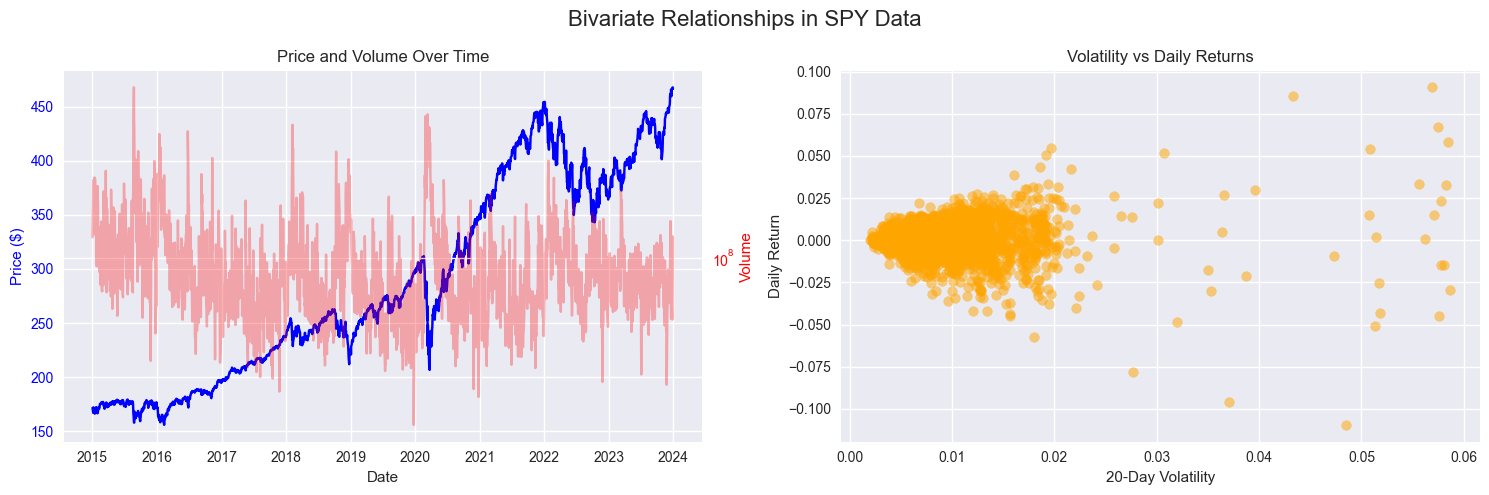

In [2]:
# Create additional features for analysis
data['Daily_Return'] = data['Close'].pct_change()
data['Volatility'] = data['Daily_Return'].rolling(20).std()  # 20-day volatility

# Bivariate analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Bivariate Relationships in SPY Data', fontsize=16)

# 1. Time series: Price and Volume
ax1 = axes[0]
ax2 = ax1.twinx()
color1, color2 = 'blue', 'red'
ax1.plot(data.index, data['Close'], color=color1, label='Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price ($)', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax2.plot(data.index, data['Volume'], color=color2, alpha=0.3, label='Volume')
ax2.set_ylabel('Volume', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_yscale('log')
axes[0].set_title('Price and Volume Over Time')

# 2. Volatility vs Returns scatter
axes[1].scatter(data['Volatility'], data['Daily_Return'], alpha=0.5, color='orange')
axes[1].set_title('Volatility vs Daily Returns')
axes[1].set_xlabel('20-Day Volatility')
axes[1].set_ylabel('Daily Return')

plt.tight_layout()
plt.show()

The first bivariate plot shows the relationship between price and volume over time, with the price on the left y-axis and volume on the right y-axis (log scale). It can be observed from this first plot that over time, price increases at a more significant rate compared to that of which volume approximately decreases. The second plot shows the relationship between 20-day volatility and daily returns, indicating how volatility affects returns. There appears to be a cluster of data observations concentrated between volatilities of 0 and 0.02 and daily returns between -0.050 and 0.025. 

## Insights & Assumptions

We can determine from the distribution visualizations that the very right-skewed distribution of close prices shows an overall bullish trend. The bivariate visualizations show that there are weak relationships between both price and volume as well as 20-day volatility and daily returns, with the former plot also revealing how price changed much more over time compared to volume, and the latter indicating low volatility clustering. 

The following assumptions and risks can be determined from this EDA:
- Stationarity Assumption: Financial time series are non-stationary - requires differencing
- Volatility Clustering: Violates i.i.d. assumption of many models
- Time-Varying Relationships: Correlations change during different market regimes

As for next steps before modeling, data cleaning can be done to implement stationarity transformation by using returns instead of prices for modeling, and volume normalization by applying a log-transformation to volume data. In addition, for feature engineering, some options include technical indicators, such as RSI, MACD, and moving averages, time features, and volatility measures.
